# Load Measurement Data (Time Series)

In this example Notebook, we show you how to load time series (channel) data from your Peak ODS Server.

The first sections are on initializing and connecting. The fun starts with "Load Measurement".

## Dependencies for this notebook

The [ASAM ODSBox](https://pypi.org/project/odsbox/) contain some functionality that wraps the ODS HTTP API making using Python easier  ;-)

It contains:
- http wrapper implemented using protobuf and requests
- utility that converts ODS DataMatrices into pandas.DataFrame

In [2]:
from odsbox.con_i import ConI
from odsbox.submatrix_to_pandas import submatrix_to_pandas

## Connect to ASAM ODS server

The ODS HTTP API is a session based API. The session ID is called conI in the ODS documentation. The [ASAM ODSBox](https://pypi.org/project/odsbox/) uses con_i as API object representing the session. Close this session to release the connection license. Otherwise the session will be auto closed after 30 minutes of inactivity.

In [3]:
conI = ConI(url='http://79.140.180.128:10032/api', auth=('Demo','mdm'))

## Load Measurement 

### Query for available measurement data
Measurement (or time series) data is contained in a structure called 'Submatrix' containing the individual channels (columns) of the measurement.
In the example below the first 10 submatrices of some MDF4 files (see query pattern) are requested from the server.
Let's pick the first submatrix of that list for further data exploration.

In [4]:
sms = conI.query_data({
#    "SubMatrix": {"measurement.test.Name": {"$like": "Profile*.mf4"}},
    "SubMatrix": {"measurement.Name": {"$like": "Profile*"}},
    "$attributes": {
        "Name": 1,
        "Id": 1
    },
    "$options": {"$rowlimit": 10}
})

print(sms)

# just pick the first one
submatrix_id = sms["SubMatrix.Id"].iloc[0]
print("Submatrix id: " + str(submatrix_id))

  SubMatrix.Name  SubMatrix.Id
0     group_0000             1
1     group_0000             2
2     group_0000             3
3     group_0000             4
4     group_0000             5
5     group_0000             6
6     group_0000             7
7     group_0000             8
8     group_0000             9
9     group_0000            10
Submatrix id: 1


### Load measurement data and convert to DataFrame
From our imported library we use 'submatrix_to_dataframe' to get a pandas.DataFrame from that submatrix we've selected above...

In [5]:
df = submatrix_to_pandas(conI, submatrix_id)
if "time" in df.columns: 
    df.set_index("time", inplace=True)
df.head()

,U_q,Coolant,Stator_winding,U_d,Stator_tooth,Motor_speed,I_d,I_q,Pm,Stator_yoke,Ambient,Torque
time,,,,,,,,,,,,
0.0,49.647366,18.024563,19.063377,-0.328863,18.268650,999.919312,-1.999769,1.094671,25.895393,18.141254,22.607321,-0.018755
0.5,49.668068,18.021235,19.061762,-0.351566,18.270451,999.944580,-2.001055,1.097549,25.889824,18.132864,22.605879,-0.019826
1.0,49.672482,18.016760,19.058098,-0.363712,18.269810,999.957214,-2.000888,1.097794,25.889381,18.076689,22.603333,-0.015597
1.5,49.652351,18.008602,19.058111,-0.338390,18.269352,999.964417,-1.999512,1.096257,25.890423,18.119398,22.595135,-0.017599
2.0,49.660404,17.992428,19.069317,-0.363959,18.269024,999.976379,-2.001059,1.098132,25.892845,18.161577,22.599865,-0.022728


### Working with the DataFrame
Now that the data is in a DataFrame, you can use all operations supported on DataFrames.
So let's dump the content of the DataFrame:

In [6]:
df.describe()

,U_q,Coolant,Stator_winding,U_d,Stator_tooth,Motor_speed,I_d,I_q,Pm,Stator_yoke,Ambient,Torque
count,14788.000000,14788.000000,14788.000000,14788.000000,14788.000000,14788.000000,14788.000000,14788.000000,14788.000000,14788.000000,14788.000000,14788.000000
mean,47.176984,18.801043,30.747415,-18.290178,27.356993,999.990768,-19.476087,56.473858,33.213100,23.788795,22.761450,43.519544
std,3.140075,0.367355,9.565914,21.063357,6.176008,0.009400,20.486365,64.907315,4.149520,4.282580,0.636221,50.840517
min,43.356476,17.913229,19.058098,-43.184044,18.268650,999.688477,-43.516140,1.094351,25.889381,18.076689,19.852739,-0.096329
25%,43.501170,18.528472,22.157340,-43.003096,21.800301,999.987488,-43.511697,1.097087,29.251081,19.850620,22.393816,0.171608
50%,49.522438,18.754805,23.516482,-0.362188,23.189936,999.990540,-2.001830,1.097990,32.267193,21.463126,23.097136,0.197358
75%,49.972665,19.083945,42.790341,-0.315381,34.857414,999.993774,-2.000438,132.617447,37.460180,28.999059,23.209249,103.087502
max,50.067646,19.969273,43.397926,-0.124184,35.824593,1000.435913,-1.996639,132.619171,39.938965,29.698214,23.719465,103.667618


... and we can plot some curves (remember we set 'time' to be the index at the beginning) ...

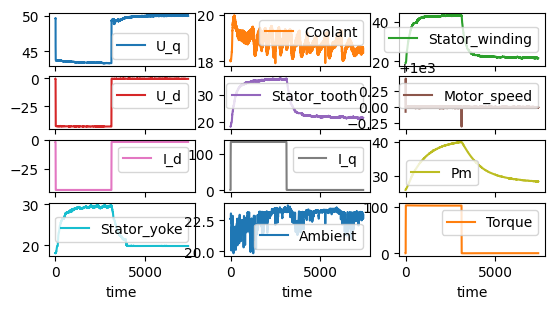

In [7]:
_ = df.plot(kind="line", subplots=True, layout=(6,3), sharex=True)

... or only one curve ...

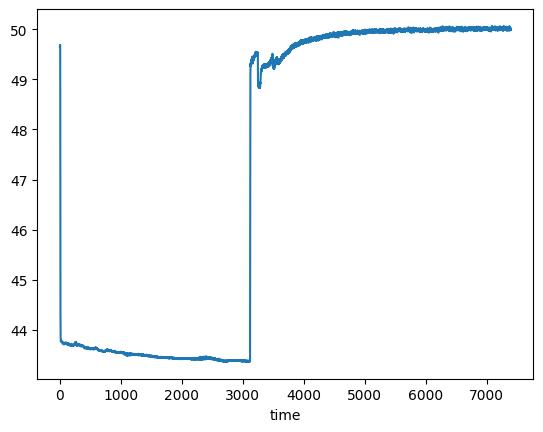

In [8]:
_ = df[df.columns[0]].plot(kind="line")

... or get some information of the index channel - time axis should be monotonic ;-)

In [9]:
df.index.is_monotonic_increasing

True

## Close Session
Don't forget to close the session to release the connection license. Otherwise the session will be auto closed after 30 minutes of inactivity.

In [10]:
conI.logout()

## License

Copyright © 2024 [Peak Solution GmbH](https://peak-solution.de)

The training material in this repository is licensed under a Creative Commons BY-NC-SA 4.0 license. See [LICENSE](../LICENSE) file for more information.